# Post Processing Demo for JPL ObjectsInField based Survey Simulation

In [1]:
from PPAddUncertainties import addUncertainties

In [2]:
import numpy as np
import pandas as pd
import sqlite3 as sql

In [3]:
def getSqlData(database,rows_start,nrows):
    """Import dataset from local SQL database
    
    Parameters:
    -----------
    database   ... path to database
    rows_start ... number of row to start
    rows_max   ... number of rows to select
    
    Returns:
    --------
    observations ... pandas dataframe containing observations from JPL database
    """
    con = sql.connect(database)
    observations = pd.read_sql("""SELECT * FROM SummaryAllProps LIMIT """+str(rows_start)+','+str(nrows), con)
    return observations

## Read in Survey Simulation data base (OpSim, #1)

In [4]:
db_path="../opsim/baseline_2snaps_v1.5_10yrs.db"

In [5]:
LSSTdf=getSqlData(db_path,0,220000)

In [6]:
LSSTdf.head()

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
0,0,294.696105,4.470982,59853.985644,0.0,30.0,z,196.668493,2,1.216567,...,343.014513,269.499503,258.357947,3.277205,-0.058536,263.929522,-26.677289,43.075471,107.116488,42.296595
1,1,297.734708,3.424593,59853.986092,0.0,30.0,z,200.180620,2,1.202906,...,343.966402,269.441627,258.270645,3.277212,-0.058539,263.934301,-26.677432,44.407891,110.104639,42.298723
2,2,300.801528,2.671025,59853.986542,0.0,30.0,z,204.810531,2,1.197034,...,343.965280,269.383595,258.183113,3.277219,-0.058542,263.939087,-26.677572,46.115388,113.132352,42.300855
3,3,298.330258,0.734934,59853.986988,0.0,30.0,z,200.969096,2,1.167930,...,343.951906,269.325763,258.095889,3.277226,-0.058545,263.943853,-26.677709,42.981215,110.566374,42.302978
4,4,295.864474,-1.054837,59853.987435,0.0,30.0,z,196.620415,2,1.145478,...,343.931858,269.267753,258.008401,3.277233,-0.058548,263.948629,-26.677844,39.950398,107.992698,42.305105


## Read in ephemeris generated with ObjectsInField (#3)

In [7]:
EPHEMdf=pd.read_csv('../observations/obs/S1_00.dat', sep='\s+', error_bad_lines=False, nrows=1000, engine='python');

In [8]:
EPHEMdf.head()

,ObjID,FieldID,FieldMJD,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),Ast-Sun(J2000x)(km),Ast-Sun(J2000y)(km),Ast-Sun(J2000z)(km),Sun-Ast-Obs(deg),V,Filtermag,V(H=0),Filter
0,S1000000a,65571,59957.365945,4.758912e+08,-23.654,217.049112,0.270929,-18.118107,-0.030224,-4.174616e+08,-1.478498e+08,-9.395642e+07,18.009743,20.053,19.647,5.853,y
1,S1000000a,75623,59972.347324,4.448136e+08,-24.693,220.825418,0.224188,-18.361193,-0.003317,-4.097950e+08,-1.692167e+08,-9.383416e+07,18.855504,19.936,19.530,5.736,y
2,S1000000a,76417,59973.380681,4.426284e+08,-24.655,221.058819,0.219934,-18.362691,-0.001057,-4.092298e+08,-1.706761e+08,-9.381745e+07,18.885384,19.926,19.525,5.726,z
3,S1000000a,77119,59974.368166,4.405385e+08,-24.703,221.278476,0.216513,-18.362153,0.000783,-4.086854e+08,-1.720690e+08,-9.380048e+07,18.910368,19.917,19.462,5.717,i
4,S1000000a,78605,59976.371198,4.362931e+08,-24.727,221.713007,0.208997,-18.355201,0.004786,-4.075680e+08,-1.748888e+08,-9.376307e+07,18.949566,19.898,19.643,5.698,r


## Run post processing module function addUncertainties

In [9]:
help(addUncertainties)

Help on function addUncertainties in module PPAddUncertainties:

addUncertainties(ephemsdf, obsdf, raName='fieldRA', decName='fieldDec', obsIdName='observationId', obsEpochName='observationStartMJD', raNameEph='AstRA(deg)', decNameEph='AstDec(deg)', obsIdNameEph='observationId', ephEpochName='FieldMJD', limMagName='fiveSigmaDepth', seeingName='seeingFwhmEff', filterMagName='Filtermag')
    Add astrometric and photometric uncertainties to observations generated through JPL ephemeris simulator.
    
    Parameters:
    -----------
    ephemsdf   ... Pandas dataFrame containing output of JPL ephemeris simulator
    obsdf    ... Pandas dataFrame containing survey simulator output such as LSST opsim 
    *Name    ... relevant column names in obsdf
    *NameEph ... relevant column names in ephemsdf
    
    
    Returns: 
    --------
    ephemsOut ... ephems Pandas dataFrame (observations with added uncertainties)



In [10]:
ephemOut=addUncertainties(EPHEMdf,LSSTdf, obsIdNameEph='FieldID')

## The new output has additional columns with astrometric and photometric uncertainties.

In [11]:
ephemOut

,ObjID,FieldID,FieldMJD,AstRange(km),AstRangeRate(km/s),AstRA(deg),AstRARate(deg/day),AstDec(deg),AstDecRate(deg/day),Ast-Sun(J2000x)(km),Ast-Sun(J2000y)(km),Ast-Sun(J2000z)(km),Sun-Ast-Obs(deg),V,Filtermag,V(H=0),Filter,AstRASigma(mas),AstDecSigma(mas),PhotometricSigma(mag)
0,S100000qa,305,59854.126037,3.313297e+08,20.271,321.634961,-0.052171,-33.992580,0.100138,3.634660e+08,-1.499523e+08,-1.763361e+08,17.022860,19.717,19.414,4.927,y,14.301200,14.301200,0.019459
1,S100000qa,338,59854.140991,3.313559e+08,20.302,321.634184,-0.051763,-33.991081,0.100453,3.634783e+08,-1.499364e+08,-1.763285e+08,17.025398,19.717,19.414,4.927,y,14.492590,14.492590,0.019880
2,S100000na,2179,59857.071272,3.346052e+08,15.556,343.582830,-0.153242,-12.648120,-0.015235,4.597993e+08,-6.490438e+07,-6.140385e+07,9.706857,20.222,19.816,4.862,y,18.080360,18.080360,0.029231
3,S100000na,2180,59857.071724,3.346058e+08,15.558,343.582761,-0.153244,-12.648127,-0.015230,4.597995e+08,-6.490387e+07,-6.140357e+07,9.706993,20.222,19.816,4.862,y,18.279819,18.279819,0.029558
4,S100000na,2212,59857.086095,3.346252e+08,15.598,343.580559,-0.153297,-12.648345,-0.015084,4.598061e+08,-6.488761e+07,-6.139470e+07,9.711317,20.222,19.816,4.862,y,15.651931,15.651931,0.026200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1000004a,210347,60209.393487,2.293656e+08,-13.086,54.375889,0.055856,4.332038,-0.139800,2.833602e+08,1.830395e+08,1.607556e+07,21.532809,14.304,14.013,3.744,i,10.002960,10.002960,0.000444
996,S1000004a,212433,60215.296023,2.229716e+08,-11.924,54.621678,0.010004,3.477887,-0.149289,2.783027e+08,1.924643e+08,1.828888e+07,19.925833,14.199,13.896,3.639,y,10.007413,10.007413,0.000819
997,S1000004a,212435,60215.296921,2.229707e+08,-11.921,54.621687,0.009986,3.477753,-0.149293,2.783019e+08,1.924657e+08,1.828922e+07,19.925566,14.199,13.896,3.639,y,10.007628,10.007628,0.000823
998,S1000004a,212466,60215.310844,2.229564e+08,-11.883,54.621824,0.009748,3.475674,-0.149361,2.782897e+08,1.924878e+08,1.829442e+07,19.921422,14.199,13.896,3.639,y,10.013352,10.013352,0.000902


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93c8076890>]],
      dtype=object)

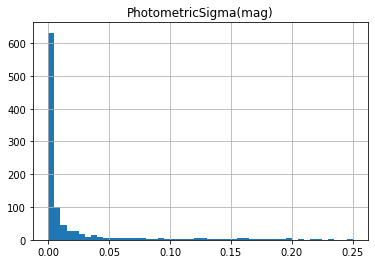

In [12]:
ephemOut.hist('PhotometricSigma(mag)', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93bcaa2d50>]],
      dtype=object)

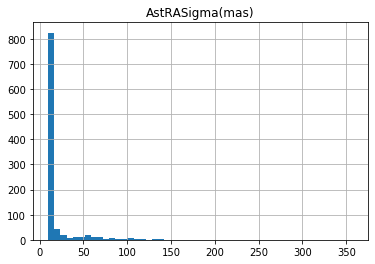

In [13]:
ephemOut.hist('AstRASigma(mas)', bins=50)